## Customer Value Analysis

A análise do valor do cliente é usada para estimar o valor total dos clientes para a empres ao longo de seu relacionamento com a mesma. Esse tipo de análise ajuda as empresas a determinarem quanto investir na aquisição e retenção de clientes, bem como a identificar os clientes mais valiosos para priorizar nos esforços de retenção.

<i>Para esta análise estaremos utilizando a base de dados do e-commerce brasileiro Olist.</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from dataviz_utils import *
init_notebook_mode(connected=True)
import datetime
import warnings
warnings.filterwarnings("ignore")

/home/matheusv/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
customers_df = pd.read_csv("../data/raw/olist_customers_dataset.csv")
# geo_df = pd.read_csv("./data/raw/olist_geolocation_dataset.csv")
orderitem_df = pd.read_csv("../data/raw/olist_order_items_dataset.csv")
orderpay_df = pd.read_csv("../data/raw/olist_order_payments_dataset.csv")
# orderreviews_df = pd.read_csv("./data/raw/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("../data/raw/olist_orders_dataset.csv")
products_df = pd.read_csv("../data/raw/olist_products_dataset.csv")
# sellers_df = pd.read_csv("./data/raw/olist_sellers_dataset.csv")
categname_df = pd.read_csv("../data/raw/product_category_name_translation.csv")

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orderpay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
orders_df = orders_df[orders_df["order_status"] == "delivered"]
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Criando a base de dados principal.

In [6]:
data = orders_df.merge(customers_df, on='customer_id').merge(orderpay_df,on='order_id')
data.drop(['order_status','order_approved_at','order_delivered_carrier_date',
           'order_estimated_delivery_date',
           'order_delivered_customer_date'],axis=1, inplace=True)

In [7]:
data.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


In [8]:
# convertendo a coluna para datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

#### Creating Recency Frequency Monetary (RFM) features

In [9]:
max_date = data['order_purchase_timestamp'].max()
max_date

Timestamp('2018-08-29 15:00:37')

Criando a feature recency

In [10]:
recency_df = (
     data[["customer_unique_id", "order_purchase_timestamp"]]
    .groupby("customer_unique_id")
    .apply(lambda x: max_date - x["order_purchase_timestamp"].max())
    .to_frame()
    .set_axis(["recency"], axis=1)
)

In [11]:
recency_df['recency'] = recency_df['recency'].apply(lambda x: x.days)
recency_df.head()

,recency
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,536
0000f6ccb0745a6a4b88665a16c9f078,320
0004aac84e0df4da2b147fca70cf8255,287


Criando a feature frequency

In [12]:
frequency_df = (
     data[["customer_unique_id", "order_purchase_timestamp"]]
    .groupby("customer_unique_id")
    .count()
    .set_axis(["frequency"], axis=1)
)
frequency_df

,frequency
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


Criando a feature monetary value

In [13]:
# price features
monetary_df = (
    data[["customer_unique_id", "payment_value"]]
    .groupby("customer_unique_id")
    .sum()
    .set_axis(["monetary_value"], axis=1)
)

In [14]:
monetary_df.head()

,monetary_value
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
0000f46a3911fa3c0805444483337064,86.22
0000f6ccb0745a6a4b88665a16c9f078,43.62
0004aac84e0df4da2b147fca70cf8255,196.89


### Iniciando as análises

In [15]:
rfm = pd.concat([recency_df, frequency_df, monetary_df], axis=1).merge(
    data.set_index("customer_unique_id"), left_index=True, right_index=True, how="left"
)

In [16]:
rfm.drop(
    [
        "customer_id",
        "customer_zip_code_prefix",
        "order_id",
        "order_purchase_timestamp",
        "payment_sequential",
        "payment_installments",
        "payment_value",
        "payment_type",
        "customer_state",
        "customer_city"
    ],
    axis=1, inplace=True
)

In [17]:
rfm.head()

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89


Aplicando clusterização sobre a base de dados

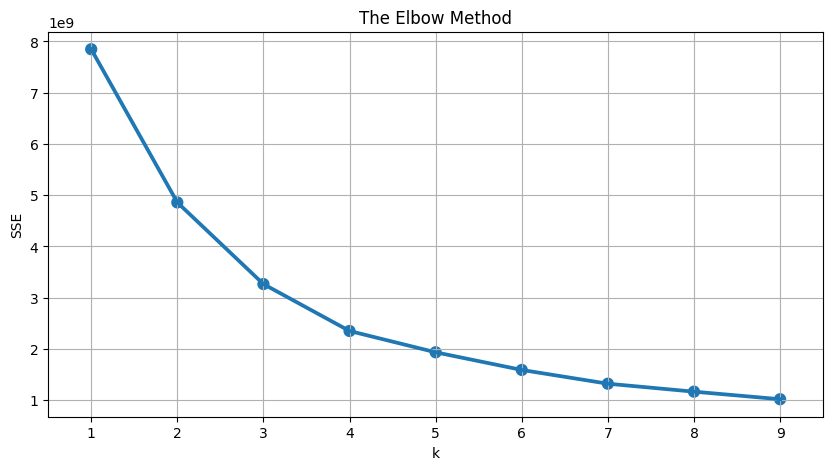

In [18]:
plt.figure(figsize=(10,5))

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 10)

distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm)
    
    distortions.append(sum(np.min(cdist(rfm, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / rfm.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(rfm, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / rfm.shape[0]
    
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.grid()
plt.show()

Vamos escolher um k=4

In [19]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(rfm)
model.labels_.shape

(100756,)

In [20]:
rfm["Cluster"] = model.labels_
rfm.head()

,recency,frequency,monetary_value,Cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1
0000f46a3911fa3c0805444483337064,536,1,86.22,0
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0


A obtenção da pontuação RFM individual pode ser feita de diversas maneiras. Nesse caso, seguiremos o caminho estatístico e classificaremos nosso cliente por meio de quartis.

A classificação das pontuações individuais do RFM é feita dividindo cada um dos valores do RFM em quartis, o que cria quatro grupos mais ou menos iguais. Em seguida, classificamos cada grupo de um a cinco; cinco sendo o melhor.

In [21]:
quantiles = rfm.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()

In [22]:
quantiles['recency']

{0.2: 91.0, 0.4: 177.0, 0.6: 268.0, 0.8: 383.0}

In [23]:
pd.DataFrame(quantiles)

,recency,frequency,monetary_value,Cluster
0.2,91.0,1.0,56.60,0.0
0.4,177.0,1.0,89.08,1.0
0.6,268.0,1.0,136.08,1.0
0.8,383.0,1.0,216.09,1.0


In [24]:
# função para atribuir pontuações R
def RScore(x, p, d):
    """
    x: line value of column (default)
    p: key name for quantiles dict
    d: quantiles dict

    """
    if x <= d[p][0.2]:
        return 5
    elif (x >= d[p][0.2]) and (x <= d[p][0.4]):
        return 4
    elif (x >= d[p][0.4]) and (x <= d[p][0.6]):
        return 3
    elif (x >= d[p][0.6]) and (x <= d[p][0.8]):
        return 2
    else:
        return 1

# função para atribuir pontuações F e M 
def FMScore(x, p, d):
    """
    x: line value of column (default)
    p: key name for quantiles dict
    d: quantiles dict

    """
    if x <= d[p][0.2]:
        return 1
    elif (x >= d[p][0.2]) and (x <= d[p][0.4]):
        return 2
    elif (x >= d[p][0.4]) and (x <= d[p][0.6]):
        return 3
    elif (x >= d[p][0.6]) and (x <= d[p][0.8]):
        return 4
    else:
        return 5

rfm['R'] = rfm['recency'].apply(RScore, args=('recency',quantiles,))
rfm['F'] = rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm['M'] = rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))

In [25]:
rfm.head()

,recency,frequency,monetary_value,Cluster,R,F,M
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,1,4
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,1,1
0000f46a3911fa3c0805444483337064,536,1,86.22,0,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0,2,1,1
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0,2,1,4


In [26]:
# função para concatenar os valores de R,F e M
def join_features_df(x):
    return str(x["R"]) + str(x["F"]) + str(x["M"])

In [27]:
rfm['rfm_segment'] = rfm.apply(join_features_df, axis=1)
# Calculate rfm score
rfm['rfm_score'] = rfm[['R','F','M']].sum(axis=1)

In [28]:
rfm.head()

,recency,frequency,monetary_value,Cluster,R,F,M,rfm_segment,rfm_score
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,1,4,4.01.04.0,9
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,1,1,4.01.01.0,6
0000f46a3911fa3c0805444483337064,536,1,86.22,0,1,1,2,1.01.02.0,4
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0,2,1,1,2.01.01.0,4
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0,2,1,4,2.01.04.0,7


Após cálculos do RFM, podemos criar segmentos de clientes acionáveis ​​e fáceis de entender pelo time de marketing.

| **Customer Segment** | **Interpretation**                                                                                       |
|----------------------|----------------------------------------------------------------------------------------------------------|
| Champions            | Comprou recentemente, compra com frequência e gasta muito.                                               |
| Loyal Customers      | Compra regularmente. Flexível a promoções.                                                               |
| Potential loyalist   | Clientes recentes com frequência média de compra.                                                        |
| Recent/New customers     | Comprou mais recentemente, mas não com frequência.                                                       |
| Promising            | Compradores recentes, mas não gastaram muito.                                                            |
| Needs attention      | Valores de recência, frequência a monetário acima da média. E podem não ter comprado muito recentemente. |
| About to sleep       | Valores de recência e frequência abaixo da média. Pode-se perde-los se nao forem reativados.             |
| At risk              | Já faz algum tempo que compraram. Necessário traze-los de volta.                                         |
| Can´t lose them      | Costumava comprar com frequência,  mas ja não compra há muito tempo.                                     |
| Hibernating          | A ultima compra foi a muito tempo e tem baixo número de pedidos. Talvez possam se perdidos.              |

In [29]:
# Creating rfm labels
segt_map = {  
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t lose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}

In [30]:
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

In [32]:
rfm.head()

,recency,frequency,monetary_value,Cluster,R,F,M,rfm_segment,rfm_score,Segment
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,1,4,4.01.04.0,9,Promising
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,1,1,4.01.01.0,6,Promising
0000f46a3911fa3c0805444483337064,536,1,86.22,0,1,1,2,1.01.02.0,4,Hibernating
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0,2,1,1,2.01.01.0,4,Hibernating
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0,2,1,4,2.01.04.0,7,Hibernating


Atribuindo Scores categóricos de acordo com o RFM Score de cada cliente.

In [33]:
# Createing labels for the scores
rfm['Score'] = 'Green'
rfm.loc[rfm['rfm_score']>5,'Score'] = 'Bronze' 
rfm.loc[rfm['rfm_score']>7,'Score'] = 'Silver' 
rfm.loc[rfm['rfm_score']>9,'Score'] = 'Gold' 
rfm.loc[rfm['rfm_score']>10,'Score'] = 'Platinum'
rfm.head()

,recency,frequency,monetary_value,Cluster,R,F,M,rfm_segment,rfm_score,Segment,Score
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,1,4,4.01.04.0,9,Promising,Silver
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,1,1,4.01.01.0,6,Promising,Bronze
0000f46a3911fa3c0805444483337064,536,1,86.22,0,1,1,2,1.01.02.0,4,Hibernating,Green
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0,2,1,1,2.01.01.0,4,Hibernating,Green
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0,2,1,4,2.01.04.0,7,Hibernating,Bronze


### Analisando os segmentos de clientes

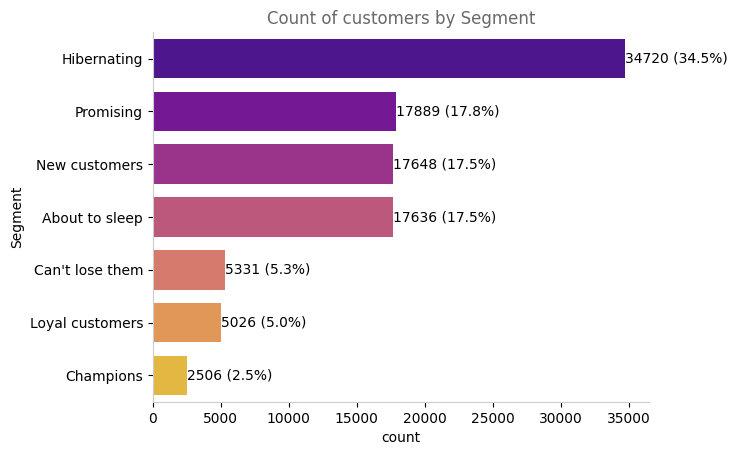

In [34]:
fig, ax = plt.subplots()

single_countplot(rfm.reset_index(), ax, y="Segment")
ax.set_title("Count of customers by Segment", color="dimgrey")
fig.show()

A maioria dos clientes a Olist estão em hibernação, isso quer dizer que são clientes que provavelmente compraram pouquíssimas vezes e que já faz muito tempo desde a última compra.

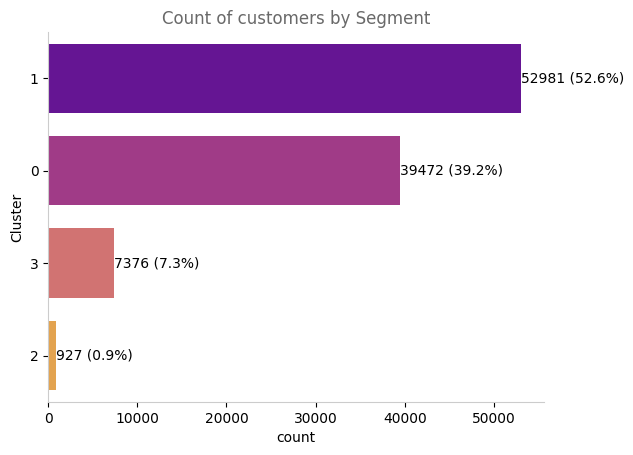

In [71]:
fig, ax = plt.subplots()

single_countplot(rfm.reset_index(), ax, y="Cluster")
ax.set_title("Count of customers by Segment", color="dimgrey")
fig.show()

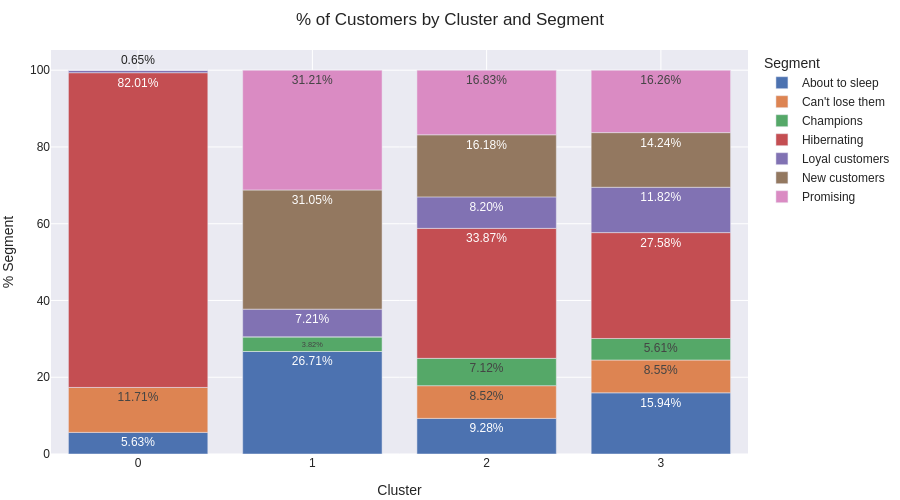

In [74]:
show_stacked_bars(rfm.reset_index(),x_value='Cluster',y_value='Segment',title='% of Customers by Cluster and Segment')

#### Interpretação dos Clusters e possíveis ações para o time de marketing

<div style="display:flex;,flex-direction:row;font-size:14px;">

<table style="height: 186px; width: 763px;margin:5px">
<tbody>
<tr>
<td style="width: 176.875px;">Cluster</td>
<td style="width: 176.875px;">RFM Label</td>
<td style="width: 176.875px;">Interpretation</td>
<td style="width: 231.375px;">Actioinable insight</td>
</tr>
<tr>
<td style="width: 176.875px;">0</td>
<td style="width: 176.875px;">82% Hibernating/ 11% Can't lose them/6% About to sleep</td>
<td style="width: 176.875px;">Clientes que n&atilde;o compram h&aacute; muito tempo e t&ecirc;m baixo n&uacute;mero de pedidos. Clientes inativos e/ou prestes a se tornarem inativos.</td>
<td style="width: 231.375px;">
<p>Enfoque em reativar os clientes hibernantes, oferecendo promo&ccedil;&otilde;es ou descontos personalizados para incentivar novas compras.</p>
<p>Acompanhamento especial para os clientes classificados como "Can't lose them" e "About to sleep", oferecendo incentivos adicionais, produtos novos/populares e mantendo contato para evitar a perda para concorr&ecirc;ncia.</p>
</td>
</tr>
</tbody>
</table>

<table style="height: 186px; width: 763px; margin:5px">
<tbody>
<tr>
<td style="width: 176.875px;">Cluster</td>
<td style="width: 176.875px;">RFM Label</td>
<td style="width: 176.875px;">Interpretation</td>
<td style="width: 231.375px;">Actioinable insight</td>
</tr>
<tr>
<td style="width: 176.875px;">1</td>
<td style="width: 176.875px;">31% New customers/31% Promising/27% About to sleep</td>
<td style="width: 176.875px;">Clientes que compraram recentemente, mas n&atilde;o com frequ&ecirc;ncia.&nbsp;Compradores recentes, mas n&atilde;o gastaram muito.&nbsp;Valores de rec&ecirc;ncia e frequ&ecirc;ncia abaixo da m&eacute;dia.</td>
<td style="width: 231.375px;">
<p>Focar em transformar os clientes "New customers" em compradores regulares, oferecendo incentivos para aumentar a frequ&ecirc;ncia de compra.</p>
<p>Para os clientes "Promising", incentivar compras adicionais com ofertas personalizadas,&nbsp;criar reconhecimento da marca e oferecer amostras gr&aacute;tis de produtos.</p>
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>
</div>



<div style="display:flex;flex-direction:row;font-size:12px;">

<table style="height: 186px; width: 763px;margin:5px">
<tbody>
<tr>
<td style="width: 176.875px;">Cluster</td>
<td style="width: 176.875px;">RFM Label</td>
<td style="width: 176.875px;">Interpretation</td>
<td style="width: 231.375px;">Actioinable insight</td>
</tr>
<tr>
<td style="width: 176.875px;">2</td>
<td style="width: 176.875px;">34% Hibernating/17% Promising/16% New customers/12% Loyal customers/7% Champions</td>
<td style="width: 176.875px;">
<p>Clientes que n&atilde;o compram h&aacute; muito tempo e t&ecirc;m baixo n&uacute;mero de pedidos. Compradores recentes, mas n&atilde;o gastaram muito. Clientes que compraram recentemente, mas n&atilde;o com frequ&ecirc;ncia. Compra regularmente e &eacute; flex&iacute;vel a promo&ccedil;oes. Comprou recentemente, compra com frequ&ecirc;ncia e gasta muito.</p>
</td>
<td style="width: 231.375px;">
<p>Oferecer incentivos para os clientes "Promising" e "New customers" para aumentar sua fidelidade e frequ&ecirc;ncia de compra.</p>
<p>Reativar os clientes "Hibernating" com ofertas especiais e personalizadas.</p>
<p>Para os clientes "Loyal customers" realizar upshell de produtos mais caros, pedir avalia&ccedil;&otilde;es/feedback e recomendar outros produtos.</p>
<p>Valorizar e recompensar os clientes "Champions" para manter sua lealdade e incentivar gastos adicionais. Recompense-os. Provavelmente ser&atilde;o os primeiros a adotar novos produtos. Ir&atilde;o promover sua marca.</p>
</td>
</tr>
</tbody>
</table>

<table style="height: 186px; width: 763px;margin:5px">
<tbody>
<tr>
<td style="width: 176.875px;">Cluster</td>
<td style="width: 176.875px;">RFM Label</td>
<td style="width: 176.875px;">Interpretation</td>
<td style="width: 231.375px;">Actioinable insight</td>
</tr>
<tr>
<td style="width: 176.875px;">3</td>
<td style="width: 176.875px;">27% Hibernating/16% Promising/15% About to sleep/14% New customers</td>
<td style="width: 176.875px;">
<p>Clientes que n&atilde;o compram h&aacute; muito tempo e t&ecirc;m baixo n&uacute;mero de pedidos. Compradores recentes, mas n&atilde;o gastaram muito.&nbsp;Valores de rec&ecirc;ncia e frequ&ecirc;ncia abaixo da m&eacute;dia.&nbsp;Clientes que compraram recentemente, mas n&atilde;o com frequ&ecirc;ncia.</p>
</td>
<td style="width: 231.375px;">
<p>Concentrar esfor&ccedil;os na reativa&ccedil;&atilde;o dos clientes "Hibernating".&nbsp;</p>
<p>Oferecer incentivos para os clientes "Promising" e "New customers" para aumentar sua fidelidade e frequ&ecirc;ncia de compra.</p>
<p>Oferecer produtos novos/populares com descontos para os clientes "About to sleep" ou reconectar estes clientes.</p>
</td>
</tr>
</tbody>
</table>

</div>

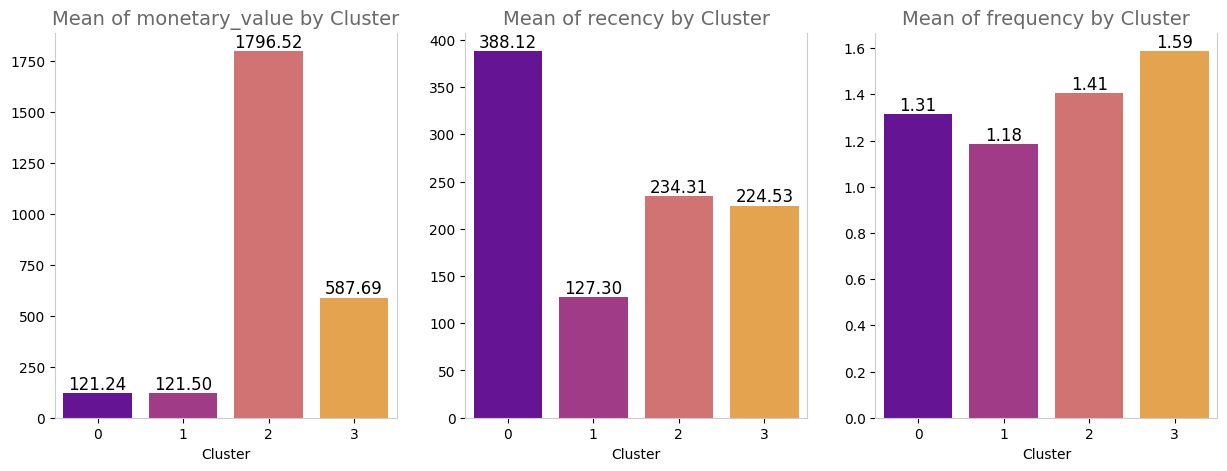

In [77]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

mean_or_sum_analysis(rfm.reset_index(),ax1, group_col='Cluster',value_col='monetary_value')
mean_or_sum_analysis(rfm.reset_index(),ax2, group_col='Cluster',value_col='recency')
mean_or_sum_analysis(rfm.reset_index(),ax3, group_col='Cluster',value_col='frequency')

In [47]:
# Aggregate data by each customer
aux = rfm.reset_index().groupby(['Cluster', 'Segment', 'Score']).agg({'customer_unique_id': lambda x: len(x)}).reset_index()

# Rename columns
aux.rename(columns={'customer_unique_id': 'Count'}, inplace=True)
aux.head()

,Cluster,Segment,Score,Count
0,0,About to sleep,Bronze,1018
1,0,About to sleep,Green,459
2,0,About to sleep,Silver,746
3,0,Can't lose them,Bronze,348
4,0,Can't lose them,Gold,1051


In [118]:
# aux['percent'] = (aux['Count'] / fig5['Count'].sum()) * 100
# aux['percent'] = aux['percent'].round(1)

Visão geral de acordo com o Cluster, Segmento e Score.

In [79]:
#colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
fig = px.treemap(aux, path=[px.Constant("Customer"), 'Cluster', 'Segment','Score'], values='Count'
                ,title="Treemap of Customer Segment",color='Segment')
#fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.update_layout(
    #treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25),font=dict(size=14))

fig.data[0].textinfo = 'label+text+value+percent parent'
#fig.show()
iplot(fig)

In [84]:
rfm.reset_index()

,customer_unique_id,recency,frequency,monetary_value,Cluster,R,F,M,rfm_segment,rfm_score,Segment,Score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,1,4,4.01.04.0,9,Promising,Silver
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,1,1,4.01.01.0,6,Promising,Bronze
2,0000f46a3911fa3c0805444483337064,536,1,86.22,0,1,1,2,1.01.02.0,4,Hibernating,Green
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0,2,1,1,2.01.01.0,4,Hibernating,Green
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0,2,1,4,2.01.04.0,7,Hibernating,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
100751,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42,2,1,1,5,1.01.05.0,7,Hibernating,Bronze
100752,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,0,3,1,2,3.01.02.0,6,About to sleep,Bronze
100753,ffff371b4d645b6ecea244b27531430a,567,1,112.46,0,1,1,3,1.01.03.0,5,Hibernating,Green
100754,ffff5962728ec6157033ef9805bacc48,118,1,133.69,1,4,1,3,4.01.03.0,8,Promising,Silver


In [89]:
df = rfm.reset_index().merge(data, on="customer_unique_id", how="left")
df.head()

,customer_unique_id,recency,frequency,monetary_value,Cluster,R,F,M,rfm_segment,rfm_score,...,order_id,customer_id,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,1,4,4.01.04.0,9,...,e22acc9c116caa3f2b7121bbb380d08e,fadbb3709178fc513abc1b2670aa1ad2,2018-05-10 10:56:27,7787,cajamar,SP,1,credit_card,8,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,1,1,4.01.01.0,6,...,3594e05a005ac4d06a72673270ef9ec9,4cb282e167ae9234755102258dd52ee8,2018-05-07 11:11:27,6053,osasco,SP,1,credit_card,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22,0,1,1,2,1.01.02.0,4,...,b33ec3b699337181488304f362a6b734,9b3932a6253894a02c1df9d19004239f,2017-03-10 21:05:03,88115,sao jose,SC,1,credit_card,8,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0,2,1,1,2.01.01.0,4,...,41272756ecddd9a9ed0180413cc22fb6,914991f0c02ef0843c0e7010c819d642,2017-10-12 20:29:41,66812,belem,PA,1,credit_card,4,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0,2,1,4,2.01.04.0,7,...,d957021f1127559cd947b62533f484f7,47227568b10f5f58a524a75507e6992c,2017-11-14 19:45:42,18040,sorocaba,SP,1,credit_card,6,196.89


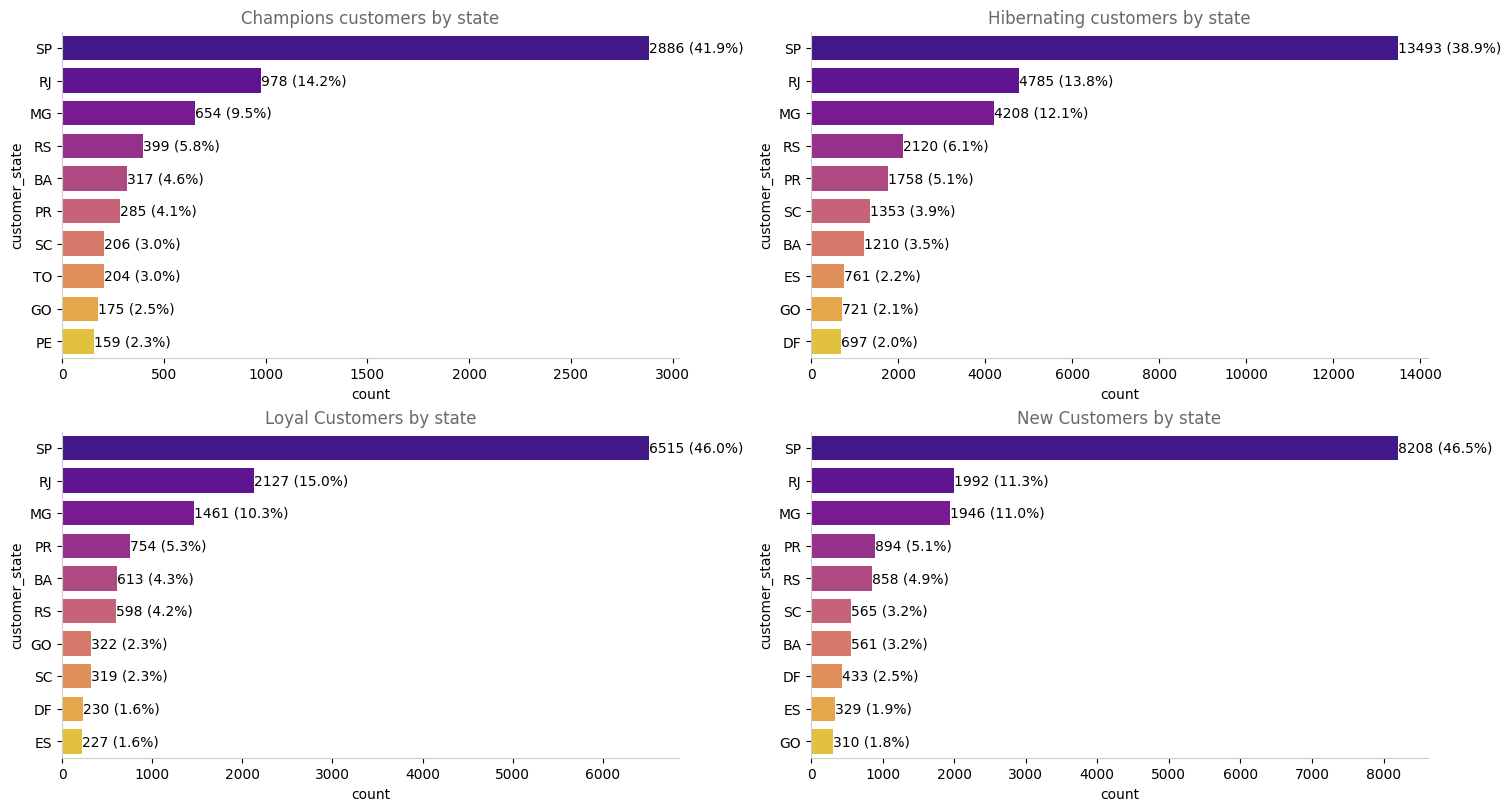

In [114]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8), constrained_layout=True)

single_countplot(
    df[df["Segment"] == "Champions"], axs[0, 0], y="customer_state", top=10
)
axs[0, 0].set_title("Champions customers by state", color="dimgrey")

single_countplot(
    df[df["Segment"] == "Hibernating"], axs[0, 1], y="customer_state", top=10
)
axs[0, 1].set_title("Hibernating customers by state", color="dimgrey")

single_countplot(
    df[df["Segment"] == "Loyal customers"], axs[1, 0], y="customer_state", top=10
)
axs[1, 0].set_title("Loyal Customers by state", color="dimgrey")

single_countplot(
    df[df["Segment"] == "New customers"], axs[1, 1], y="customer_state", top=10
)
axs[1, 1].set_title("New Customers by state", color="dimgrey")
fig.show()

A localização do cliente não possui muito significado, sendo impossível separar um cliente de um segmento específico de outro por meio do local, uma vez que o padrão é o mesmo para os segmentos.